<a href="https://colab.research.google.com/github/pilipandr770/HomeWork11/blob/main/HomeWork11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
step: 100, loss: 1.9612, accuracy: 0.5664
step: 200, loss: 1.8028, accuracy: 0.6719
step: 300, loss: 1.7095, accuracy: 0.7930
step: 400, loss: 1.5779, accuracy: 0.9102
step: 500, loss: 1.5638, accuracy: 0.9297
step: 600, loss: 1.5415, accuracy: 0.9297
step: 700, loss: 1.5134, accuracy: 0.9570
step: 800, loss: 1.5107, accuracy: 0.9648
step: 900, loss: 1.5310, accuracy: 0.9414
step: 1000, loss: 1.5312, accuracy: 0.9414
step: 1100, loss: 1.5294, accuracy: 0.9375
step: 1200, loss: 1.5088, accuracy: 0.9531
step: 1300, loss: 1.5176, accuracy: 0.9531
step: 1400, loss: 1.4962, accuracy: 0.9688
step: 1500, loss: 1.5082, accuracy: 0.9570
step: 1600, loss: 1.5139, accuracy: 0.9492
step: 1700, loss: 1.5002, accuracy: 0.9609
step: 1800, loss: 1.5331, accuracy: 0.9297
step: 1900, loss: 1.5211, accuracy: 0.9492
step: 2000, loss: 1.4992, accuracy: 0.9688
step: 2100, loss: 1.4911, accuracy: 0.9727
step: 2200, loss: 1.4878, accuracy: 0.9805
step: 2300, 

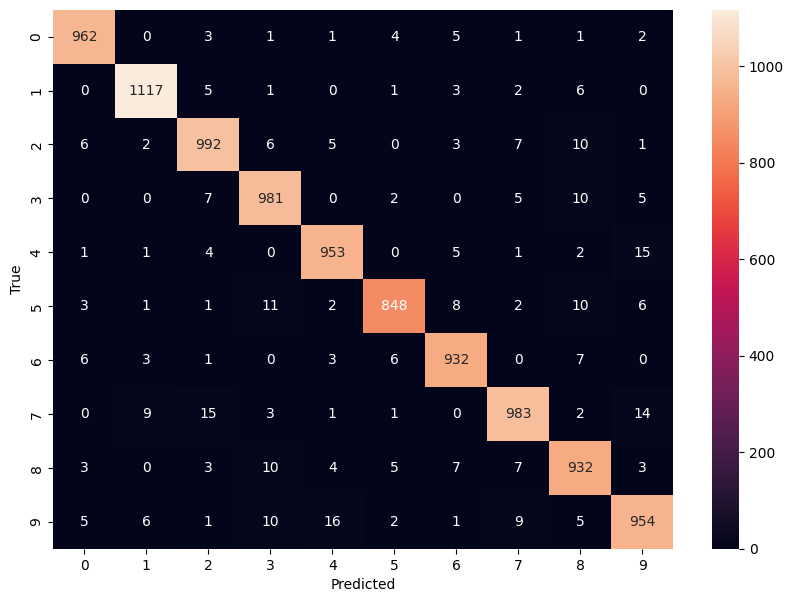

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [1]:
# Заголовок: Нейронна мережа для розпізнавання рукописних цифр

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import keras as K
import seaborn as sns
from sklearn.metrics import confusion_matrix

num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 3000 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
display_step = 100 # кожні 100 ітерацій ми будемо показувати поточне значення функції втрат і точності

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

# Завантаження даних MNIST
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Перетворення розмірності з (28, 28) до (784, )
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Перетворення до float32
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')

# Нормалізація зображень до [0, 1]
x_train, x_test = x_train / 255., x_test / 255.

# Перетворення міток до one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# tf.data API для перетворення набору даних на batch та перемішування
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Встановлення вагів
random_normal = tf.initializers.RandomNormal()

# Hidden layer weights
weights = {
    'h1': tf.Variable(random_normal([num_features, n_hidden_1])),
    'h2': tf.Variable(random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(random_normal([n_hidden_2, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

# Створення моделі нейронної мережі
def neural_net(input_data):
    hidden_layer_1 = tf.add(tf.matmul(input_data, weights['h1']), biases['b1'])
    hidden_layer_1 = tf.nn.sigmoid(hidden_layer_1)

    hidden_layer_2 = tf.add(tf.matmul(hidden_layer_1, weights['h2']), biases['b2'])
    hidden_layer_2 = tf.nn.sigmoid(hidden_layer_2)

    output_layer = tf.add(tf.matmul(hidden_layer_2, weights['out']), biases['out'])
    return tf.nn.softmax(output_layer)

# Функція втрат
def cross_entropy_loss(x, y):
    logits = neural_net(x)
    y = tf.cast(y, tf.float32)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    return loss

# Оптимізація
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Оптимізатор
optimizer = tf.optimizers.Adam(learning_rate)

# Оптимізація моделі
def run_optimization(x, y):
    with tf.GradientTape() as g:
        loss = cross_entropy_loss(x, y)
    gradients = g.gradient(loss, [weights['h1'], weights['h2'], weights['out'], biases['b1'], biases['b2'], biases['out']])
    optimizer.apply_gradients(zip(gradients, [weights['h1'], weights['h2'], weights['out'], biases['b1'], biases['b2'], biases['out']]))

# Навчання моделі
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)

    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy_loss(batch_x, batch_y)
        acc = accuracy(pred, batch_y)
        print(f"step: {step}, loss: {loss:.4f}, accuracy: {acc:.4f}")

# Тестування моделі
pred = neural_net(x_test)
print(f"Test Accuracy: {accuracy(pred, y_test):.4f}")

# Виведення матриці плутанини
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Виведення звіту про класифікацію
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))
